# Make Your Own Neural Network

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy.special
%matplotlib inline

### Network implementation

In [2]:
# neural network class definition
class NeuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

### Preparing the MNIST Training Data

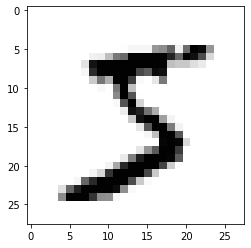

In [3]:
df = pd.read_csv("mnist_train.csv", header=None)
X_train = df.values[:,1:]
Y_train = df.values[:,0]

test_img = X_train[0].reshape(28,28)
plt.imshow(test_img,cmap='Greys', interpolation='None')

The first thing we need to do is to rescale the input colour values from the large range \[0 to 255\] to the much smaller range \[0.01 - 1.0\].

In [4]:
X_train = (X_train / 255.0) * 0.99 + 0.01
print(X_train)

[[0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 ...
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]]


Now we can begin to train a network on our examples.

In [5]:
nodes_i = 784
nodes_h = 100
nodes_o = 10

learn_rate = 0.3

n = NeuralNetwork(nodes_i, nodes_h, nodes_o, learn_rate)

for x, y  in zip(X_train, Y_train):
    targets = np.zeros(nodes_o) + 0.01
    targets[y] = 0.99
    
    n.train(x, targets)

### Testing the Network

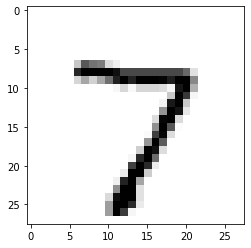

In [6]:
df = pd.read_csv("mnist_test.csv", header=None)
X_test = df.values[:,1:]
Y_test = df.values[:,0]

test_img = X_test[0].reshape(28,28)
plt.imshow(test_img,cmap='Greys', interpolation='None')

In [7]:
X_test = (X_test / 255.0) * 0.99 + 0.01
print(X_test)

[[0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 ...
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]]


In [8]:
scorecard = []

for x, y in zip(X_test, Y_test):
    outputs = n.query(x)
    label = np.argmax(outputs)
    
    scorecard.append( int(label == y) )

scorecard_arr = np.asarray(scorecard)
print("performance = ", scorecard_arr.sum() / scorecard_arr.size)
        

performance =  0.9391


### Some Improvements

#### Tweaking the Learning Rate

Let's try adjusting the learning rate to see if we can boost performance

In [33]:
learn_rates = [0.05, 0.1, 0.2, 0.3, 0.6, 0.9]
scores = []

for curr_rate in learn_rates:

    learn_rate = curr_rate
    
    n = NeuralNetwork(nodes_i, nodes_h, nodes_o, learn_rate)

    for x, y in zip(X_train, Y_train):
        targets = np.zeros(nodes_o) + 0.01
        targets[y] = 0.99

        n.train(x, targets)
    
    
    scorecard = []

    for x, y in zip(X_test, Y_test):
        outputs = n.query(x)
        label = np.argmax(outputs)

        scorecard.append( int(label == y) )

    scorecard_arr = np.asarray(scorecard)
    
    score = scorecard_arr.sum() / scorecard_arr.size
    
    print("learning rate: ", learn_rate)
    print("performance: ", score)
    print()
    
    scores.append(score)
    

learning rate:  0.05
performance:  0.9394

learning rate:  0.1
performance:  0.948

learning rate:  0.2
performance:  0.9501

learning rate:  0.3
performance:  0.9468

learning rate:  0.6
performance:  0.9201

learning rate:  0.9
performance:  0.8779



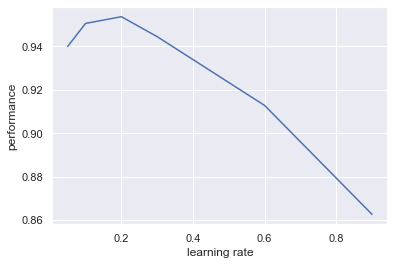

In [32]:
# convert to pandas dataframe
scores_df = {'learning rate': learn_rates, 'performance': scores}
scores_df = pd.DataFrame(scores_df)

# plot using lineplot
sns.set(style='darkgrid')
sns.lineplot(x='learning rate', y='performance', markers='o', data=scores_df)

Based on these results, we'll lower the learning rate to 0.2.

In [35]:
learn_rate = 0.2

#### Doing Multiple Runs

We can improve the model by passing through the data multiple times. Each pass is called an **epoch**. Let's test to see how many epochs we should use.

In [39]:
num_epochs = [1,2,4,5,6,9]
scores = []

for num in num_epochs:
    
    n = NeuralNetwork(nodes_i, nodes_h, nodes_o, learn_rate)
    for i in range(num):
        for x, y in zip(X_train, Y_train):
            targets = np.zeros(nodes_o) + 0.01
            targets[y] = 0.99

            n.train(x, targets)
    
    
    scorecard = []

    for x, y in zip(X_test, Y_test):
        outputs = n.query(x)
        label = np.argmax(outputs)

        scorecard.append( int(label == y) )

    scorecard_arr = np.asarray(scorecard)
    
    score = scorecard_arr.sum() / scorecard_arr.size
    
    print("number of epochs: ", num)
    print("performance: ", score)
    print()
    
    scores.append(score)

number of epochs:  1
performance:  0.9435

number of epochs:  2
performance:  0.9597

number of epochs:  4
performance:  0.9592

number of epochs:  5
performance:  0.9627

number of epochs:  6
performance:  0.9602

number of epochs:  9
performance:  0.9609



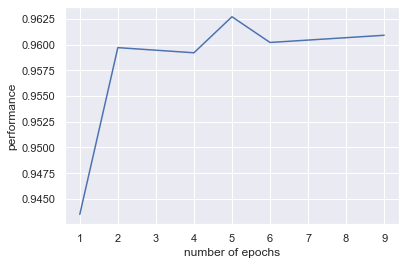

In [40]:
# convert to pandas dataframe
scores_df = {'number of epochs': num_epochs, 'performance': scores}
scores_df = pd.DataFrame(scores_df)

# plot using lineplot
sns.set(style='darkgrid')
sns.lineplot(x='number of epochs', y='performance', markers='o', data=scores_df)

Based on these results, we'll train with 5 epochs.

#### Change the Network's Shape

We can try to increase the **learning capacity** by changing the number of hidden nodes.

In [42]:
hidden_size = [5,10,70,100,200,500]
scores = []

for curr_size in hidden_size:
    
    nodes_h = curr_size
    
    n = NeuralNetwork(nodes_i, nodes_h, nodes_o, learn_rate)
    
    for i in range(5):
        for x, y in zip(X_train, Y_train):
            targets = np.zeros(nodes_o) + 0.01
            targets[y] = 0.99

            n.train(x, targets)
    
    
    scorecard = []

    for x, y in zip(X_test, Y_test):
        outputs = n.query(x)
        label = np.argmax(outputs)

        scorecard.append( int(label == y) )

    scorecard_arr = np.asarray(scorecard)
    
    score = scorecard_arr.sum() / scorecard_arr.size
    
    print("number of hidden nodes: ", nodes_h)
    print("performance: ", score)
    print()
    
    scores.append(score)

number of hidden nodes:  5
performance:  0.7911

number of hidden nodes:  10
performance:  0.8833

number of hidden nodes:  70
performance:  0.9567

number of hidden nodes:  100
performance:  0.9579

number of hidden nodes:  200
performance:  0.9673

number of hidden nodes:  500
performance:  0.975



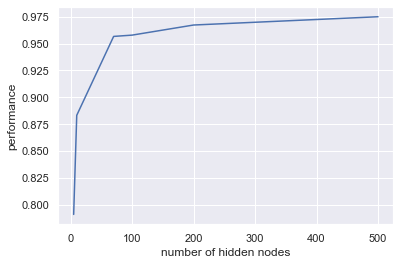

In [45]:
# convert to pandas dataframe
scores_df = {'number of hidden nodes': hidden_size, 'performance': scores}
scores_df = pd.DataFrame(scores_df)

# plot using lineplot
sns.set(style='darkgrid')
sns.lineplot(x='number of hidden nodes', y='performance', markers='o', data=scores_df)

To avoid overfitting, we keep the number of hidden nodes to 200.